In [19]:
import librosa
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [20]:
path = "../data/spec_3sec/blues/blues.00000/blues.00000_0.npy"
spec = np.load(path)
print(spec.shape)
print(spec.dtype)

(1025, 130)
complex64


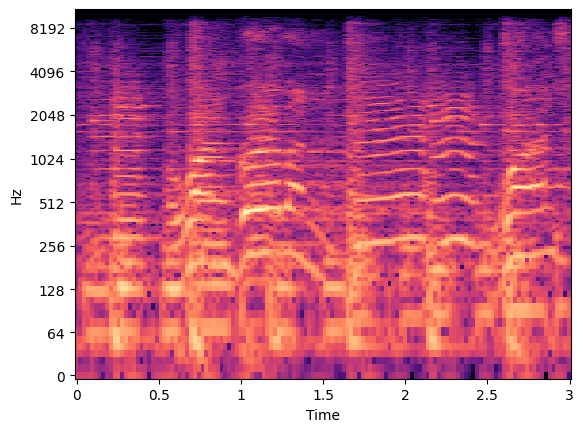

In [21]:
magspec = np.abs(spec)
librosa.display.specshow(
    librosa.amplitude_to_db(magspec, ref=np.max), y_axis="log", x_axis="time"
)

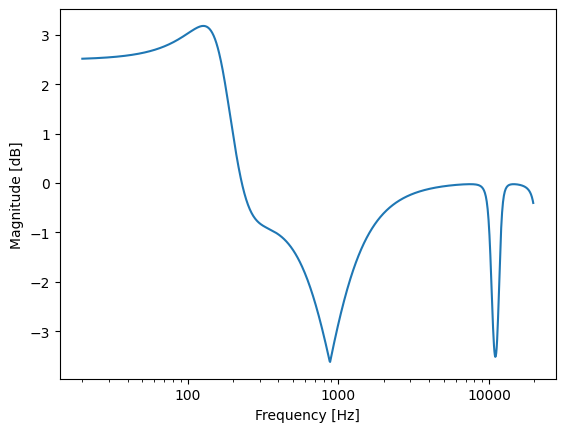

In [22]:
# eq = np.random.rand(spec.shape[0])
# print(eq.shape)
# plt.plot(eq)

import audio_dspy as adsp
import numpy as np
import matplotlib.pyplot as plt

fs = 44100 // 2  # sample rate
worN = np.logspace(1, 3.3, num=1000, base=20)  # frequencies to plot

# design EQ
eq = adsp.EQ(fs)
eq.add_LPF(10000, 0.707)
eq.add_lowshelf(200, 1.4, 2)
eq.add_notch(880, 0.707)


# plot EQ magnitude response
eq.plot_eq_curve(worN=worN)
plt.show()

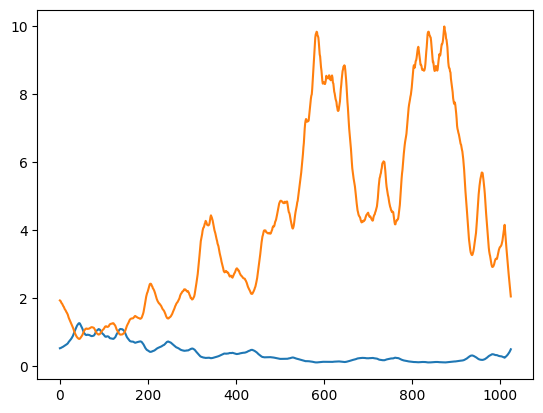

In [23]:
def f(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)


def runningMean(x, N):
    return np.convolve(x, np.ones((N,)) / N)[(N - 1) :]


def rescale(x, min, max):
    return (x - np.min(x)) / (np.max(x) - np.min(x)) * (max - min) + min


def db2mag(x):
    return np.power(10, x / 20)


x = np.linspace(0, 1025, 1025)
filter = f(x)
filter = runningMean(filter, 15)
filter = rescale(filter, -20, 2)
filter = db2mag(filter)
inv_filter = 1 / filter
plt.plot(filter)
plt.plot(inv_filter)

In [24]:
magspec_eq = magspec * filter[:, np.newaxis]

In [25]:
# spec_eq = magspec_eq * np.exp(1j * np.angle(spec))
eq_spec = spec * filter[:, np.newaxis]
wav = librosa.istft(eq_spec)
ipd.Audio(wav, rate=22050)

In [26]:
orig_wav = librosa.istft(spec)
ipd.Audio(orig_wav, rate=22050)

In [27]:
restored_magspec = magspec_eq * inv_filter[:, np.newaxis]
restored_spec = restored_magspec * np.exp(1j * np.angle(spec))
restored_wav = librosa.istft(restored_spec)
ipd.Audio(restored_wav, rate=22050)